# Data Info
---

- **place:** Name of the country or region
- **pop1980:** Estimated population for the year 1980
- **pop2000:** Estimated population for the year 2000
- **pop2010:** Estimated population for the year 2010
- **pop2022:** Estimated population for the year 2022
- **pop2023:** Estimated population for the year 2023
- **pop2030:** Estimated population for the year 2030
- **pop2050:** Estimated population for the year 2050
- **country:** ISO 3166-1 alpha-3 code of the country
- **area:** Total land and water area of the country (in square kilometers)
- **landAreaKm:** Land area of the country (in square kilometers)
- **cca2:** ISO 3166-1 alpha-2 code of the country
- **cca3:** ISO 3166-1 alpha-3 code of the country
- **netChange:** Annual net change in population (in thousands)
- **growthRate:** Annual population growth rate (as a percentage)
- **worldPercentage:** Percentage of world population
- **density:** Population density (in persons per square kilometer)
- **densityMi:** Population density (in persons per square mile)
- **rank:** Rank of the country by population
---

# My goal will be to find out:
---

- Add up all country populations and plot a graph over the years
- The 10 most populated countries of each year
- The 10 least populated countries of each year
- 10 countries that had a drastic change between years
- 10 countries with the highest population growth
- 10 countries with the lowest population growth
- Population density by country
- World population percentage
---

# Imports

In [117]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Data

In [118]:
df = pd.read_csv('data/2023_Countries by Population.csv')
df.head()

,place,pop1980,pop2000,pop2010,pop2022,pop2023,pop2030,pop2050,country,area,landAreaKm,cca2,cca3,netChange,growthRate,worldPercentage,density,densityMi,rank
0,356,696828385.0,1.059634e+09,1.240614e+09,1.417173e+09,1.428628e+09,1.514994e+09,1.670491e+09,India,3287590.0,2973190.0,IN,IND,0.4184,0.0081,0.1785,480.5033,1244.5036,1
1,156,982372466.0,1.264099e+09,1.348191e+09,1.425887e+09,1.425671e+09,1.415606e+09,1.312636e+09,China,9706961.0,9424702.9,CN,CHN,-0.0113,-0.0002,0.1781,151.2696,391.7884,2
2,840,223140018.0,2.823986e+08,3.111828e+08,3.382899e+08,3.399966e+08,3.521623e+08,3.753920e+08,United States,9372610.0,9147420.0,US,USA,0.0581,0.0050,0.0425,37.1686,96.2666,3
3,360,148177096.0,2.140724e+08,2.440162e+08,2.755013e+08,2.775341e+08,2.921501e+08,3.172252e+08,Indonesia,1904569.0,1877519.0,ID,IDN,0.0727,0.0074,0.0347,147.8196,382.8528,4
4,586,80624057.0,1.543699e+08,1.944545e+08,2.358249e+08,2.404857e+08,2.740298e+08,3.678085e+08,Pakistan,881912.0,770880.0,PK,PAK,0.1495,0.0198,0.0300,311.9625,807.9829,5


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   place            234 non-null    int64  
 1   pop1980          234 non-null    float64
 2   pop2000          234 non-null    float64
 3   pop2010          234 non-null    float64
 4   pop2022          234 non-null    float64
 5   pop2023          234 non-null    float64
 6   pop2030          234 non-null    float64
 7   pop2050          234 non-null    float64
 8   country          234 non-null    object 
 9   area             234 non-null    float64
 10  landAreaKm       234 non-null    float64
 11  cca2             233 non-null    object 
 12  cca3             234 non-null    object 
 13  netChange        226 non-null    float64
 14  growthRate       234 non-null    float64
 15  worldPercentage  228 non-null    float64
 16  density          234 non-null    float64
 17  densityMi       

### I will delete the columns that I will not use

In [120]:
df.drop(['cca2', 'cca3', 'netChange', 'densityMi', 'place'], axis = 1, inplace = True)

### Checking for null values

In [121]:
df.isna().sum()

pop1980            0
pop2000            0
pop2010            0
pop2022            0
pop2023            0
pop2030            0
pop2050            0
country            0
area               0
landAreaKm         0
growthRate         0
worldPercentage    6
density            0
rank               0
dtype: int64

### Searching for rows with null values

In [122]:
df[df.isnull().any(axis = 1)]

,pop1980,pop2000,pop2010,pop2022,pop2023,pop2030,pop2050,country,area,landAreaKm,growthRate,worldPercentage,density,rank
228,6106.0,6274.0,6052.0,5862.0,5840.0,5651.0,5165.0,Saint Pierre and Miquelon,242.00,242.00,-0.0038,NaN,24.1322,229
229,11452.0,5138.0,4938.0,4390.0,4386.0,4301.0,3781.0,Montserrat,102.00,102.00,-0.0009,NaN,43.0000,230
230,2240.0,3080.0,3187.0,3780.0,3791.0,3869.0,3779.0,Falkland Islands,12173.00,12173.00,0.0029,NaN,0.3114,231
231,3637.0,2074.0,1812.0,1934.0,1935.0,1948.0,2096.0,Niue,261.00,261.00,0.0005,NaN,7.4138,232
232,1647.0,1666.0,1367.0,1871.0,1893.0,2046.0,2430.0,Tokelau,12.00,10.00,0.0118,NaN,189.3000,233
233,733.0,651.0,596.0,510.0,518.0,561.0,731.0,Vatican City,0.44,0.44,0.0157,NaN,1177.2727,234


### As the numbers of countries with null worldPercentage are very low, I will fill the null worldPercentage with 0

In [123]:
df.fillna(value = 0, inplace = True)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pop1980          234 non-null    float64
 1   pop2000          234 non-null    float64
 2   pop2010          234 non-null    float64
 3   pop2022          234 non-null    float64
 4   pop2023          234 non-null    float64
 5   pop2030          234 non-null    float64
 6   pop2050          234 non-null    float64
 7   country          234 non-null    object 
 8   area             234 non-null    float64
 9   landAreaKm       234 non-null    float64
 10  growthRate       234 non-null    float64
 11  worldPercentage  234 non-null    float64
 12  density          234 non-null    float64
 13  rank             234 non-null    int64  
dtypes: float64(12), int64(1), object(1)
memory usage: 25.7+ KB


### Now I will start the visualizations

# Visualization
---

## Add up all country populations and plot a graph over the years
---

In [125]:
years = ['1980', '2000', '2010', '2022', '2023', '2030', '2050']
population = [df['pop1980'].sum(), df['pop2000'].sum(), df['pop2010'].sum(),
              df['pop2022'].sum(), df['pop2023'].sum(), df['pop2030'].sum(),
              df['pop2050'].sum()]

fig = go.Figure(data = go.Scatter(x = years, y = population, mode = 'markers+lines', marker = dict(color = 'gray')))
fig.update_traces(line = dict(width = 4, color = 'red'))


fig.update_layout(
    title = 'Sum of Population by Year',
    xaxis = dict(title = 'Year', tickangle = 45, gridcolor = 'rgba(255, 255, 255, 0.3)'),
    yaxis = dict(title = 'Population', gridcolor = 'rgba(255, 255, 255, 0.3)'),
    plot_bgcolor = 'black',
    paper_bgcolor = 'black',
    font = dict(color = 'white'),
    showlegend = False
)

fig.show()

## The 10 most populous countries of each year
---

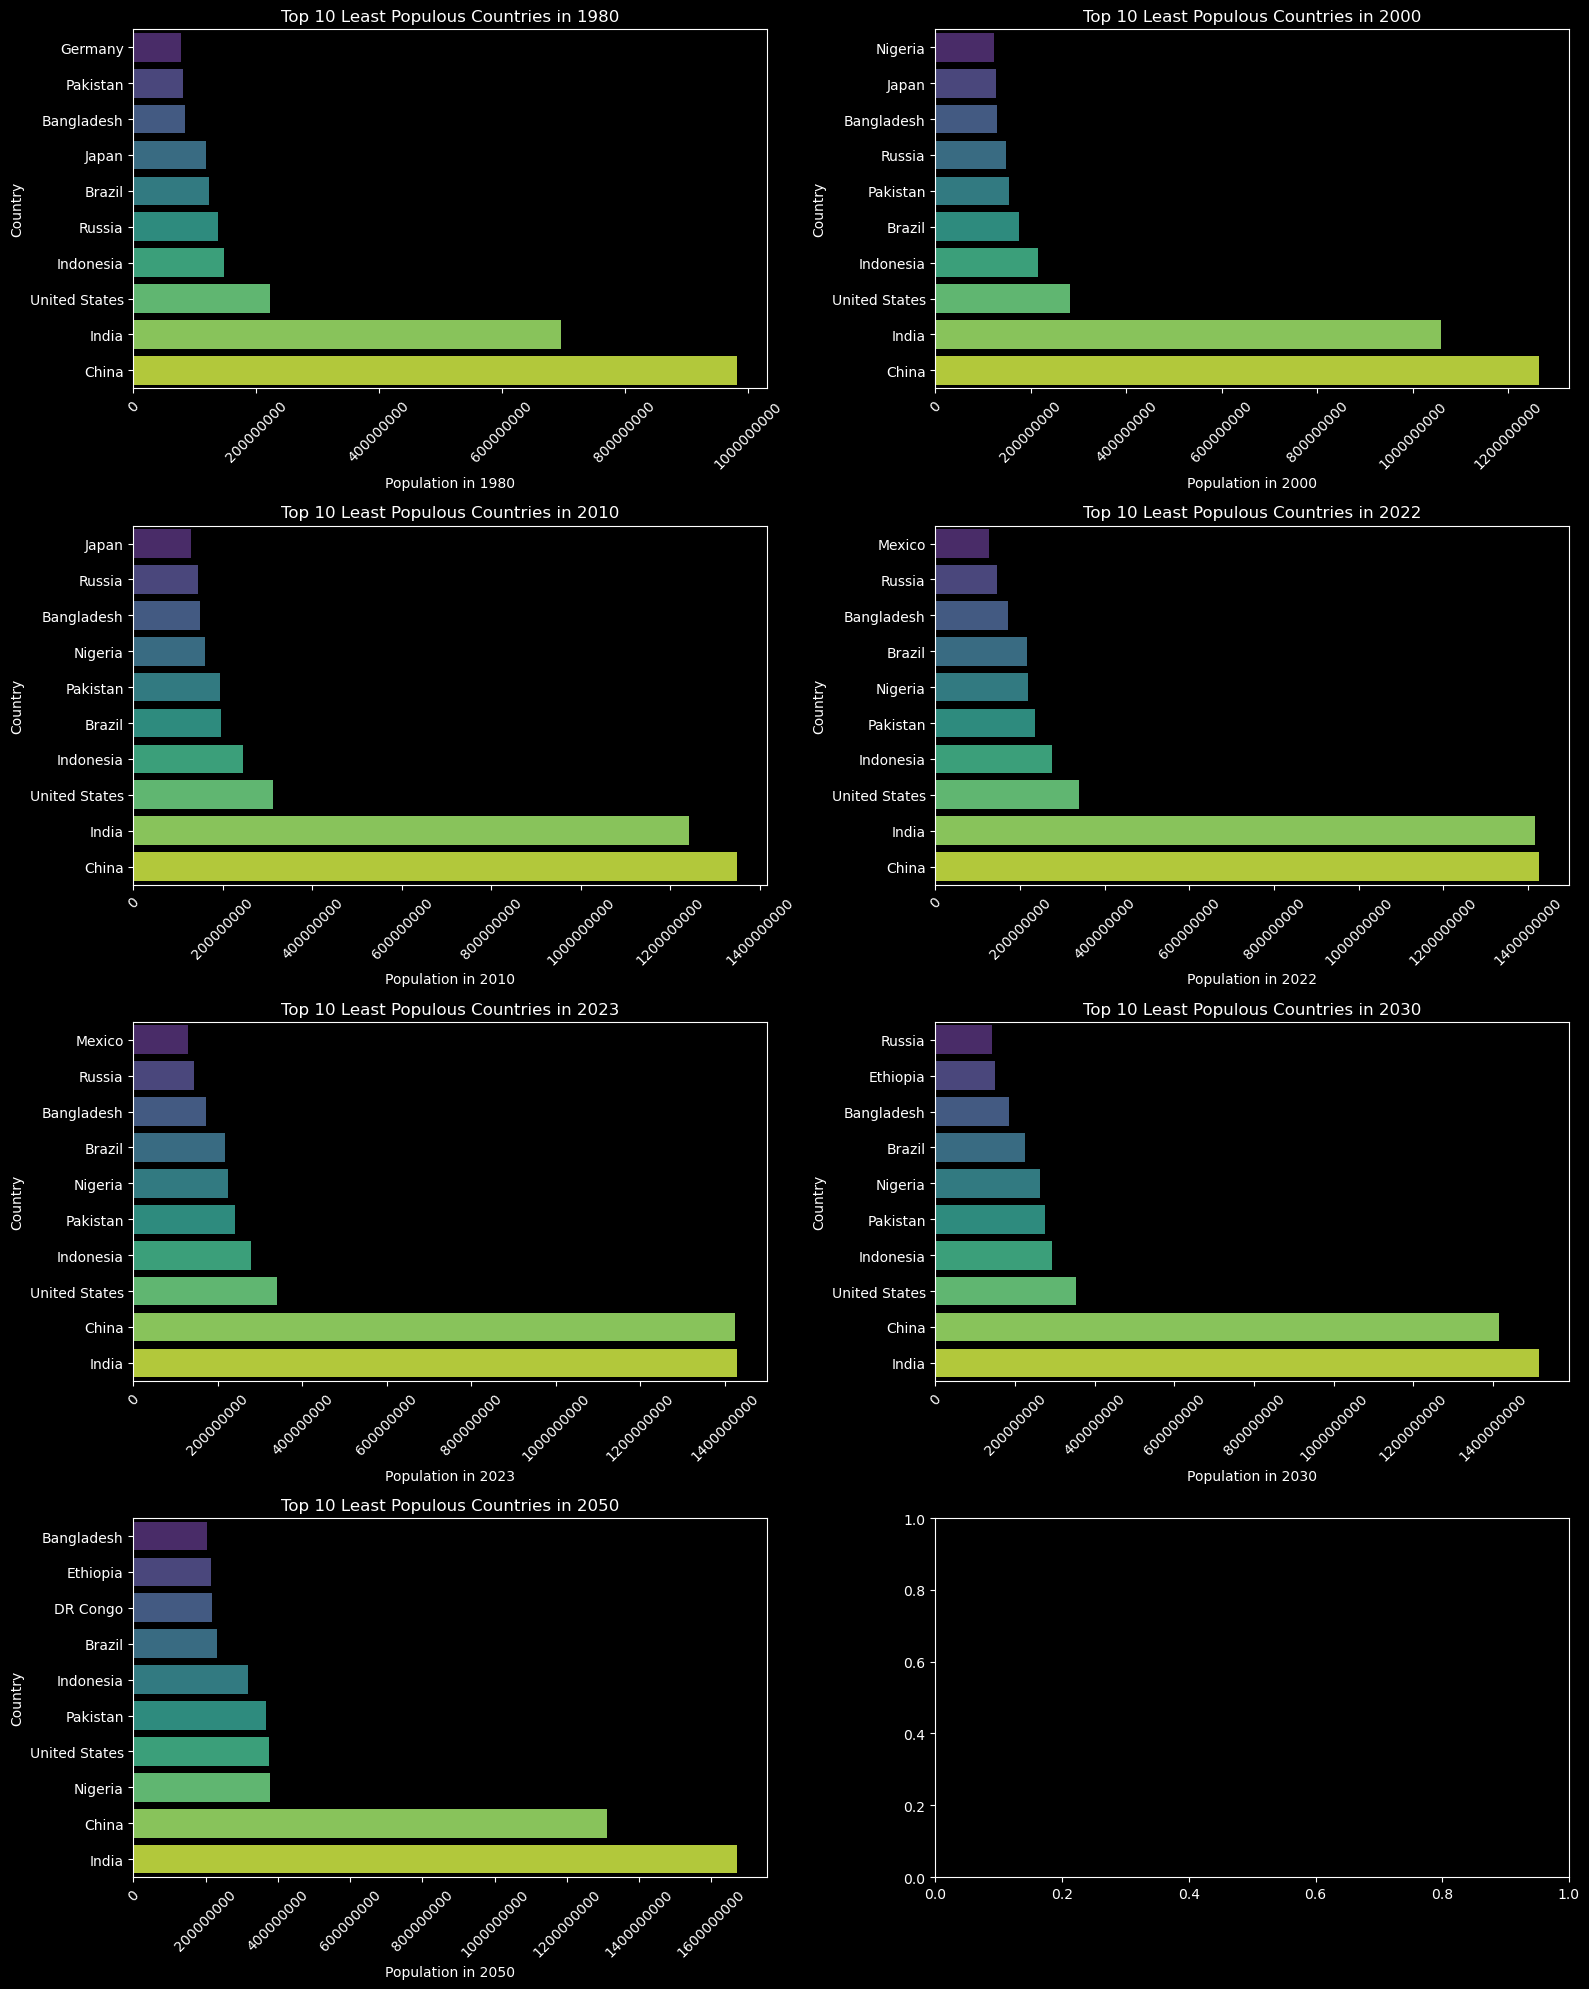

In [127]:
years = [1980, 2000, 2010, 2022, 2023, 2030, 2050]
data = {
    1980: df.nlargest(10, 'pop1980').sort_values('pop1980'),
    2000: df.nlargest(10, 'pop2000').sort_values('pop2000'),
    2010: df.nlargest(10, 'pop2010').sort_values('pop2010'),
    2022: df.nlargest(10, 'pop2022').sort_values('pop2022'),
    2023: df.nlargest(10, 'pop2023').sort_values('pop2023'),
    2030: df.nlargest(10, 'pop2030').sort_values('pop2030'),
    2050: df.nlargest(10, 'pop2050').sort_values('pop2050')
}

fig, axes = plt.subplots(4, 2, figsize = (16, 20))
axes = axes.flatten()

for i, year in enumerate(years):
    ax = axes[i]
    top10 = data[year]
    sns.barplot(data = top10, y = 'country', x = f'pop{year}', palette = 'viridis', ax = ax)
    ax.set_xlabel(f'Population in {year}')
    ax.set_ylabel('Country')
    ax.set_title(f'Top 10 Least Populous Countries in {year}')
    ax.ticklabel_format(style = 'plain', axis = 'x')
    ax.tick_params(axis = 'x', rotation = 45)

plt.tight_layout()
plt.show()

## The 10 least populous countries in 1980, 2000, 2023 and 2030
---

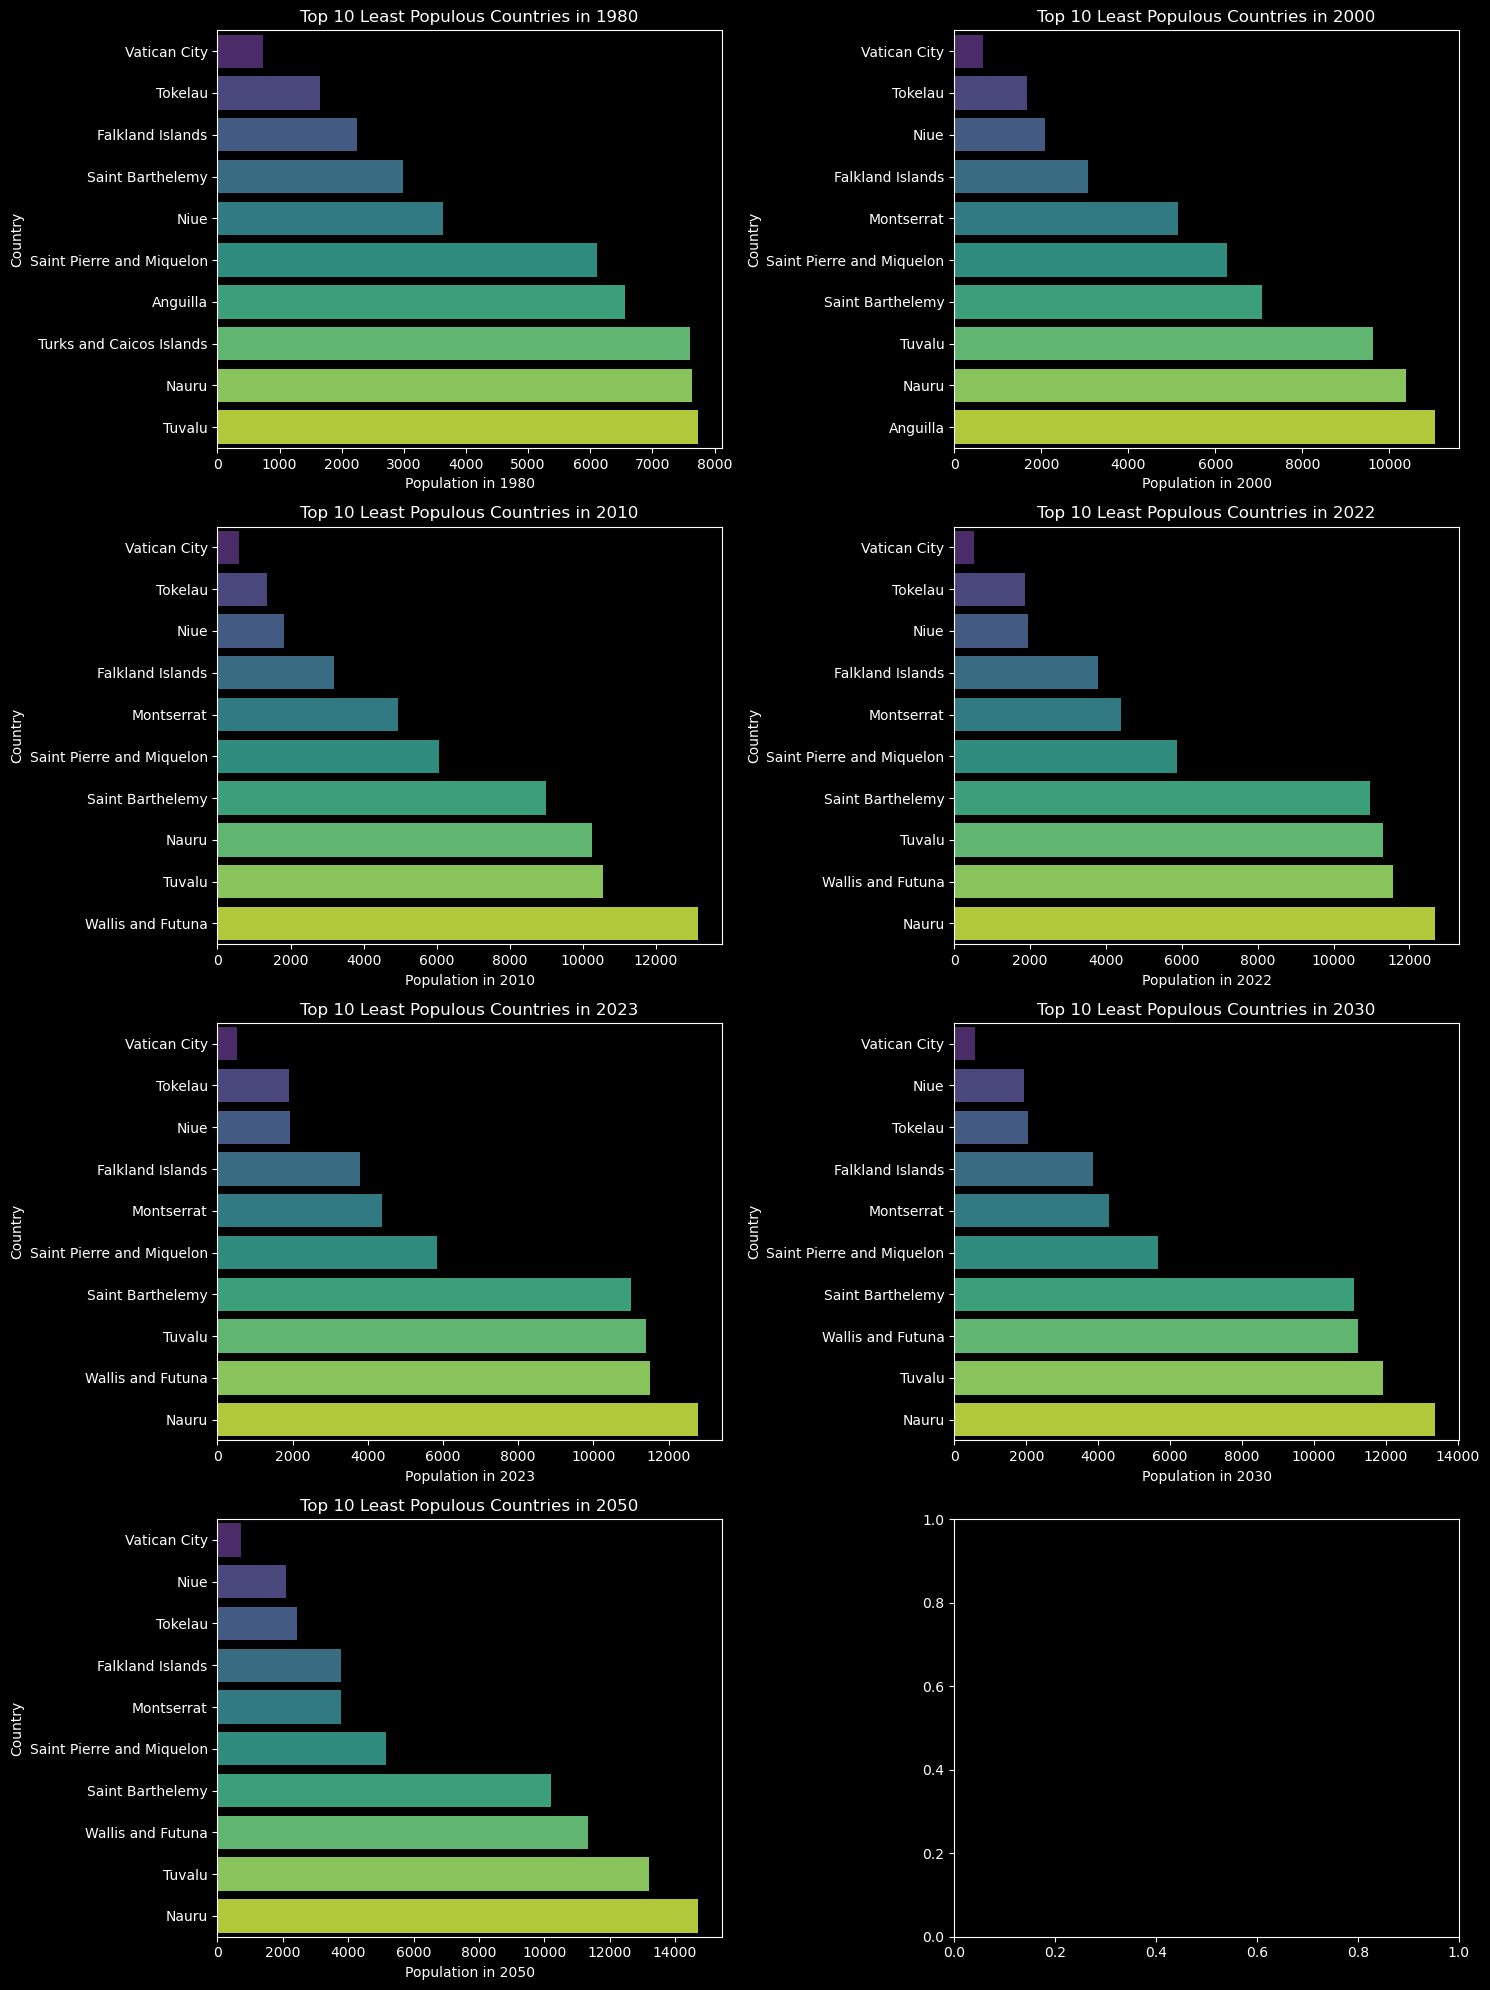

In [126]:
years = [1980, 2000, 2010, 2022, 2023, 2030, 2050]
data = {
    1980: df.nsmallest(10, 'pop1980').sort_values('pop1980'),
    2000: df.nsmallest(10, 'pop2000').sort_values('pop2000'),
    2010: df.nsmallest(10, 'pop2010').sort_values('pop2010'),
    2022: df.nsmallest(10, 'pop2022').sort_values('pop2022'),
    2023: df.nsmallest(10, 'pop2023').sort_values('pop2023'),
    2030: df.nsmallest(10, 'pop2030').sort_values('pop2030'),
    2050: df.nsmallest(10, 'pop2050').sort_values('pop2050')
}

fig, axes = plt.subplots(4, 2, figsize = (15, 20))
axes = axes.flatten()

for i, year in enumerate(years):
    ax = axes[i]
    top10 = data[year]
    sns.barplot(data = top10, y = 'country', x = f'pop{year}', palette = 'viridis', ax = ax)
    ax.set_xlabel(f'Population in {year}')
    ax.set_ylabel('Country')
    ax.set_title(f'Top 10 Least Populous Countries in {year}')
    ax.ticklabel_format(style = 'plain', axis = 'x')

plt.tight_layout()
plt.show()

## 10 countries with the highest population growth
---

Text(0, 0.5, 'Country')

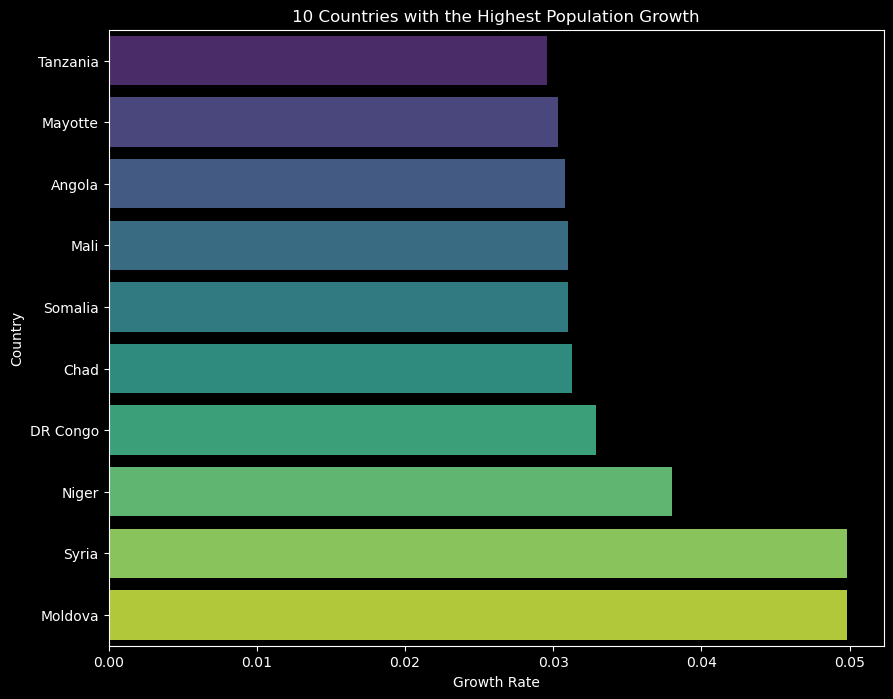

In [153]:
plt.figure(figsize = (10, 8))

top_10 = df.nlargest(10, 'growthRate').sort_values('growthRate')

ax = sns.barplot(x = top_10['growthRate'], y = top_10['country'], data = top_10, palette = 'viridis')
ax.set_title('10 Countries with the Highest Population Growth')
ax.set_xlabel('Growth Rate')
ax.set_ylabel('Country')

## 10 countries with the lowest population growth
---

Text(0, 0.5, 'Country')

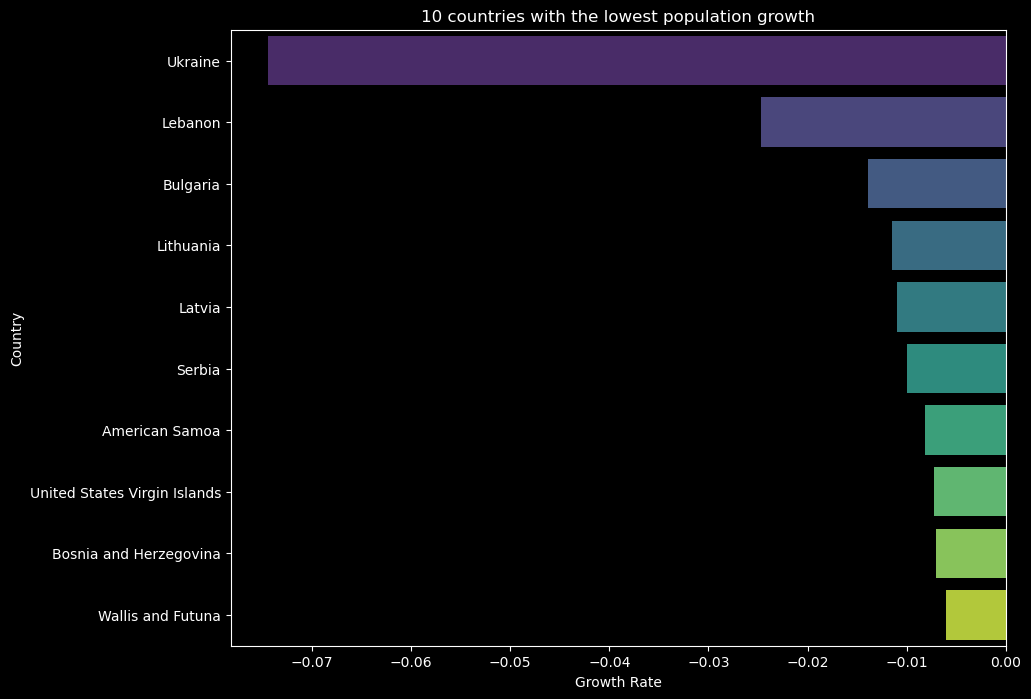

In [155]:
plt.figure(figsize = (10, 8))

top_10 = df.nsmallest(10, 'growthRate').sort_values('growthRate')

ax = sns.barplot(x = top_10['growthRate'], y = top_10['country'], data = top_10, palette = 'viridis')
ax.set_title('10 countries with the lowest population growth')
ax.set_xlabel('Growth Rate')
ax.set_ylabel('Country')

## Population density by country
---

Text(0, 0.5, 'Country')

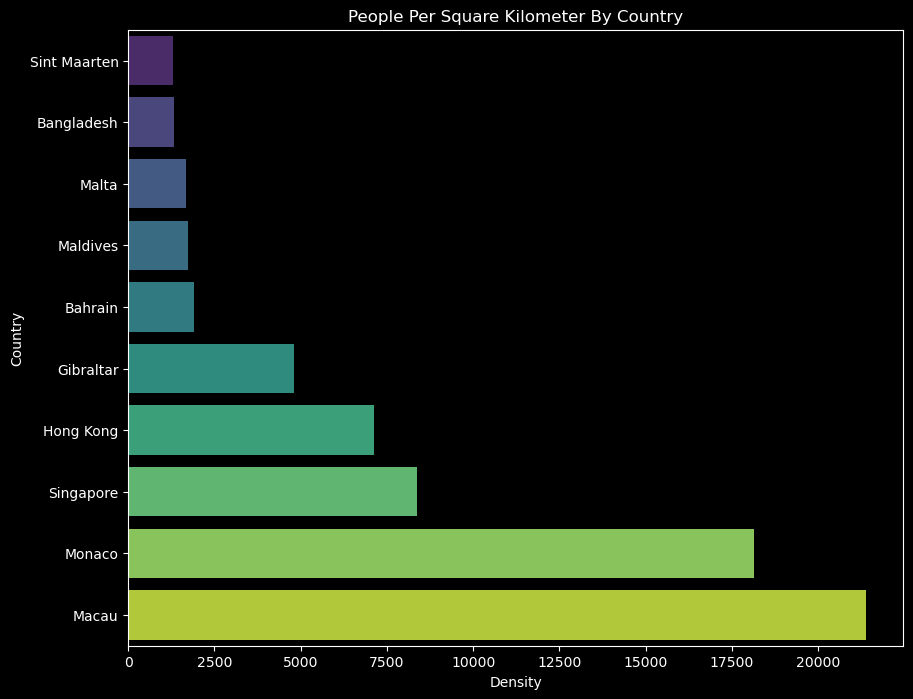

In [244]:
plt.figure(figsize = (10, 8))

top_10 = df.nlargest(10, 'density').sort_values('density')

ax = sns.barplot(x = top_10['density'], y = top_10['country'], data = top_10, palette = 'viridis')
ax.set_title('People Per Square Kilometer By Country')
ax.set_xlabel('Density')
ax.set_ylabel('Country')

## World population percentage
---

Text(0.5, 0, 'World Percentage')

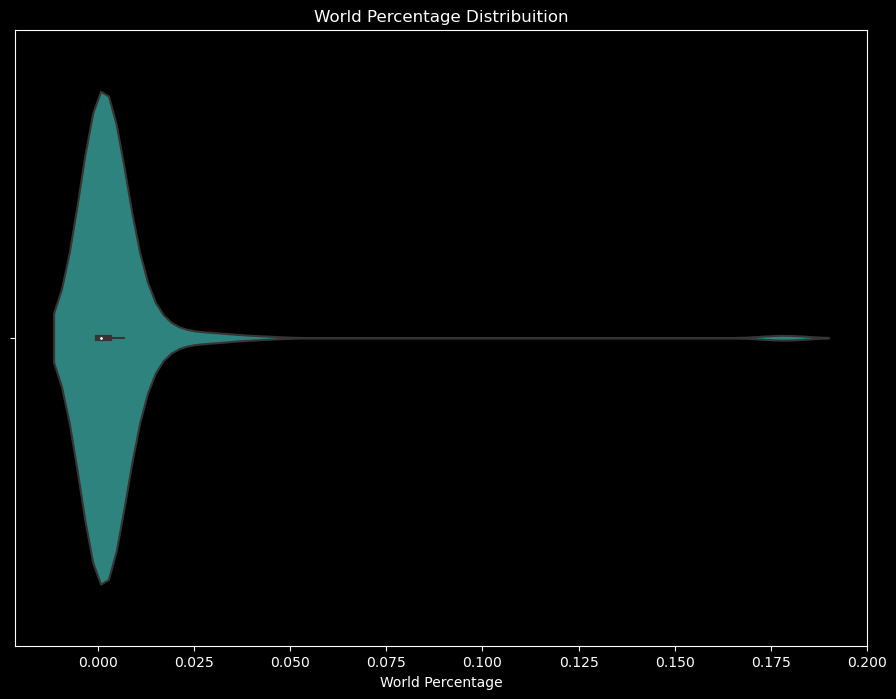

In [167]:
plt.figure(figsize = (11, 8))
ax = sns.violinplot(x = df['worldPercentage'], palette = 'viridis')
ax.set_title('World Percentage Distribuition')
ax.set_xlabel('World Percentage')

# 🏁 The End! Feel free to criticize! 🏁